In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline

In [2]:
# Settings
plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings('ignore')

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'

In [4]:
# Get the data
!wget $url

--2020-03-16 05:38:11--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.248.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.248.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68907 (67K) [text/plain]
Saving to: ‘time_series_19-covid-Confirmed.csv’

time_series_19-covi 100%[===================>]  67.29K  --.-KB/s    in 0s      

2020-03-16 05:38:11 (291 MB/s) - ‘time_series_19-covid-Confirmed.csv’ saved [68907/68907]



In [5]:
covid = pd.read_csv('time_series_19-covid-Confirmed.csv')

In [6]:
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428


In [7]:
covid_US = covid[covid['Country/Region']=='US'].T

In [8]:
covid_US.columns = covid_US.iloc[0]

In [9]:
covid_US.drop(['Province/State','Country/Region','Lat','Long'],axis=0,inplace=True)

In [10]:
# convert index to date time
covid_US.index = pd.to_datetime(covid_US.index)

In [11]:
covid_US.head()

Province/State,Washington,New York,California,Massachusetts,Diamond Princess,Grand Princess,Georgia,Colorado,Florida,New Jersey,Oregon,Texas,Illinois,Pennsylvania,Iowa,Maryland,North Carolina,South Carolina,Tennessee,Virginia,Arizona,Indiana,Kentucky,District of Columbia,Nevada,New Hampshire,Minnesota,Nebraska,Ohio,Rhode Island,Wisconsin,Connecticut,Hawaii,Oklahoma,Utah,Kansas,Louisiana,Missouri,Vermont,Alaska,Arkansas,Delaware,Idaho,Maine,Michigan,Mississippi,Montana,New Mexico,North Dakota,South Dakota,West Virginia,Wyoming,"Kitsap, WA","Solano, CA","Santa Cruz, CA","Napa, CA","Ventura, CA","Worcester, MA","Gwinnett, GA","DeKalb, GA","Floyd, GA","Fayette, GA","Gregg, TX","Monmouth, NJ","Burlington, NJ","Camden, NJ","Passaic, NJ","Union, NJ","Eagle, CO","Larimer, CO","Arapahoe, CO","Gunnison, CO","Kane, IL","Monroe, PA","Philadelphia, PA","Norfolk, VA","Arlington, VA","Spotsylvania, VA","Loudoun, VA","Prince George's, MD","Pottawattamie, IA","Camden, NC","Pima, AZ","Noble, IN","Adams, IN","Boone, IN","Dane, WI","Pierce, WI","Cuyahoga, OH","Weber, UT","Bennington County, VT","Carver County, MN","Charlotte County, FL","Cherokee County, GA","Collin County, TX","Jefferson County, KY","Jefferson Parish, LA","Shasta County, CA","Spartanburg County, SC","Harrison County, KY","Johnson County, IA","Berkshire County, MA","Davidson County, TN","Douglas County, OR","Fresno County, CA","Harford County, MD","Hendricks County, IN","Hudson County, NJ","Johnson County, KS","Kittitas County, WA","Manatee County, FL","Marion County, OR","Okaloosa County, FL","Polk County, GA","Riverside County, CA","Shelby County, TN","St. Louis County, MO","Suffolk County, NY","Ulster County, NY","Volusia County, FL","Fairfax County, VA","Rockingham County, NH","Washington, D.C.","Montgomery County, PA","Alameda County, CA","Broward County, FL","Lee County, FL","Pinal County, AZ","Rockland County, NY","Saratoga County, NY","Charleston County, SC","Clark County, WA","Cobb County, GA","Davis County, UT","El Paso County, CO","Honolulu County, HI","Jackson County, OR","Jefferson County, WA","Kershaw County, SC","Klamath County, OR","Madera County, CA","Pierce County, WA","Tulsa County, OK","Douglas County, CO","Providence County, RI","Chatham County, NC","Delaware County, PA","Douglas County, NE","Fayette County, KY","Marion County, IN","Middlesex County, MA","Nassau County, NY","Ramsey County, MN","Washoe County, NV","Wayne County, PA","Yolo County, CA","Santa Clara County, CA","Clark County, NV","Fort Bend County, TX","Grant County, WA","Santa Rosa County, FL","Williamson County, TN","New York County, NY","Montgomery County, MD","Suffolk County, MA","Denver County, CO","Summit County, CO","Bergen County, NJ","Harris County, TX","San Francisco County, CA","Contra Costa County, CA","Orange County, CA","Norfolk County, MA","Maricopa County, AZ","Wake County, NC","Westchester County, NY","Grafton County, NH","Hillsborough, FL","Placer County, CA","San Mateo, CA","Sonoma County, CA","Umatilla, OR","Fulton County, GA","Washington County, OR","Snohomish County, WA","Humboldt County, CA","Sacramento County, CA","San Diego County, CA","San Benito, CA","Los Angeles, CA","King County, WA","Cook County, IL","Skagit, WA","Thurston, WA","Island, WA","Whatcom, WA","Marin, CA","Calaveras, CA","Stanislaus, CA","San Joaquin, CA","Essex, MA","Charlton, GA","Collier, FL","Pinellas, FL","Alachua, FL","Nassau, FL","Pasco, FL","Dallas, TX","Tarrant, TX","Montgomery, TX","Middlesex, NJ","Jefferson, CO","Multnomah, OR","Polk, OR","Deschutes, OR","McHenry, IL","Lake, IL","Bucks, PA","Hanover, VA","Lancaster, SC","Sullivan, TN","Johnson, IN","Howard, IN","St. Joseph, IN","Knox, NE","Stark, OH","Anoka, MN","Olmsted, MN","Summit, UT","Fairfield, CT","Litchfield, CT","Orleans, LA","Pennington, SD","Beadle, SD","Charles Mix, SD","Davison, SD","Minnehaha, SD","Bon Homme, SD","Socorro, NM","Bernalillo, NM","Oakland, MI","Wayne, MI","New Castle, DE",Alabama,Puerto Rico,"Virgin Islands, U.S.",Gua

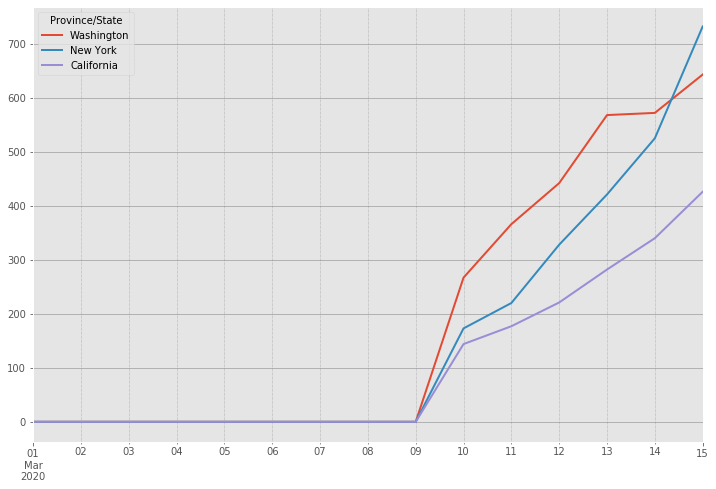

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
covid_US.loc['2020-03-01':,['Washington','New York','California']]\
.plot(ax=ax,linewidth=2)
# Turn on grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

Text(0, 0.5, 'growth')

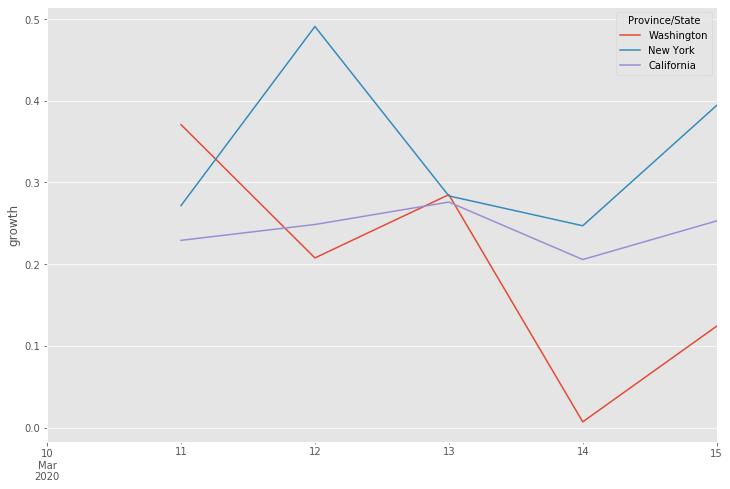

In [13]:
covid_US.loc['2020-03-01':,['Washington','New York','California']]\
.pct_change().dropna().plot(figsize=(12,8))
plt.ylabel('growth')

In [14]:
# Others
dr = ['Province/State','Country/Region','Lat','Long']

In [15]:
covid_italy = covid[covid['Country/Region']=='Italy'].T.drop(dr,axis=0)
covid_iran = covid[covid['Country/Region']=='Iran'].T.drop(dr,axis=0)
covid_SK = covid[covid['Country/Region']=='Korea, South'].T.drop(dr,axis=0)
covid_spain = covid[covid['Country/Region']=='Spain'].T.drop(dr,axis=0)

In [16]:
covid_top1_4 = pd.concat([covid_italy,covid_iran,covid_SK,covid_spain],axis=1)
covid_top1_4.columns = ['Italy','Iran','South Korea','Spain']

In [17]:
# convert index to date time
covid_top1_4.index = pd.to_datetime(covid_top1_4.index)

Text(0, 0.5, 'Number of confirmed cases (cumulative)')

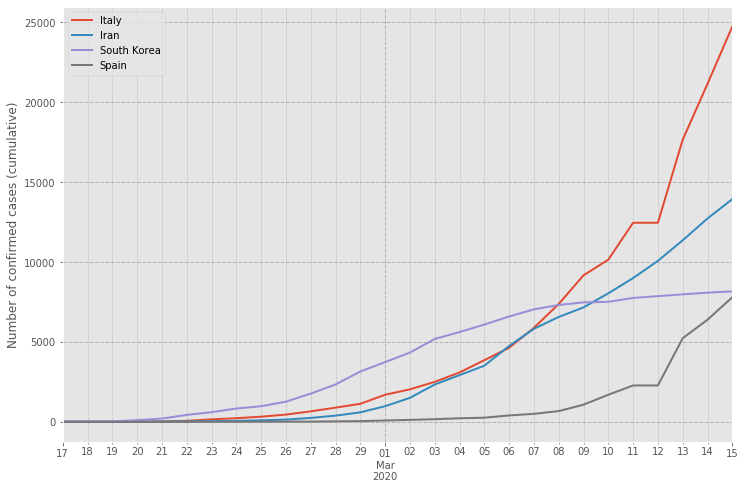

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
covid_top1_4.loc['2020-02-17':,:]\
.plot(ax=ax,linewidth='2')
# Turn on grid
ax.grid(which='major', linestyle='-.', linewidth='0.5', color='gray')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
ax.set_ylabel('Number of confirmed cases (cumulative)')

In [19]:
covid_top1_4_growth = covid_top1_4.loc['2020-02-17':'2020-03-14',:].pct_change().rolling(2).mean()

In [20]:
covid_top1_4_growth

,Italy,Iran,South Korea,Spain
2020-02-17,NaN,NaN,NaN,NaN
2020-02-18,NaN,NaN,NaN,NaN
2020-02-19,0.000000,NaN,0.016667,0.000000
2020-02-20,0.000000,NaN,1.177419,0.000000
2020-02-21,2.833333,2.050000,1.658189,0.000000
2020-02-22,3.883333,1.577778,1.042044,0.000000
2020-02-23,1.800000,0.545635,0.756425,0.000000
2020-02-24,0.988710,0.477159,0.387011,0.000000
2020-02-25,0.441766,0.487991,0.278295,1.000000
2020-02-26,0.406473,0.510267,0.231777,1.583333


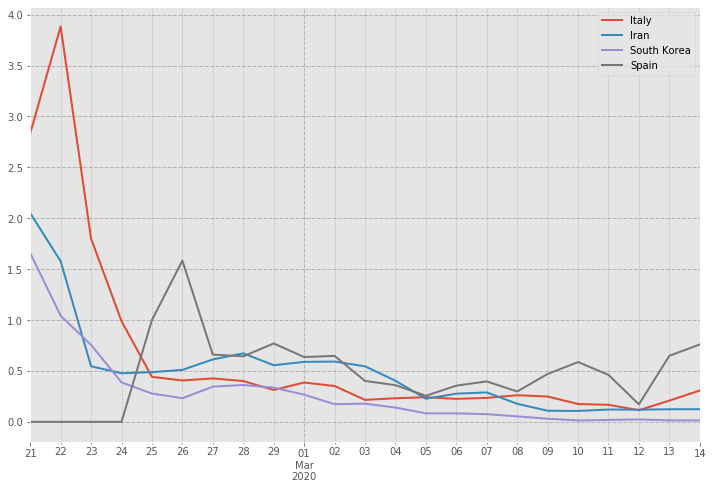

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
covid_top1_4_growth.loc['2020-02-17':'2020-03-14',:].dropna()\
.plot(ax=ax,linewidth='2')
# Turn on grid
ax.grid(which='major', linestyle='-.', linewidth='0.5', color='gray')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

In [22]:
covid_top1_4_growth.median()

Italy          0.261297
Iran           0.477159
South Korea    0.173182
Spain          0.401786
dtype: float64

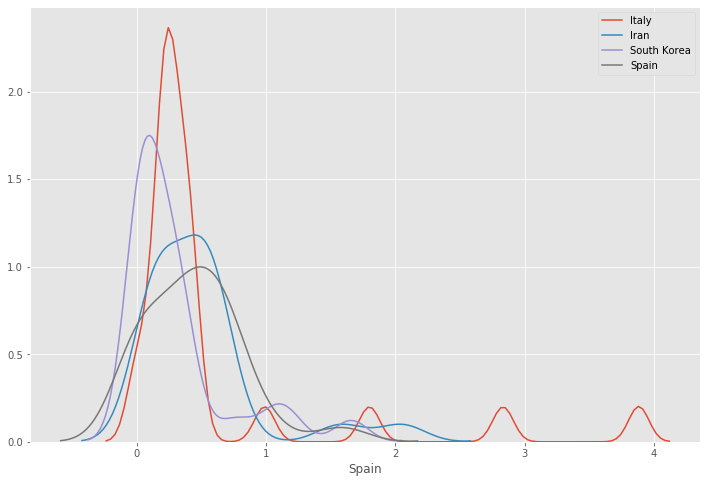

In [23]:
plt.figure(figsize=(12,8))
sns.distplot(covid_top1_4_growth['Italy'].dropna(),hist=False,label='Italy')
sns.distplot(covid_top1_4_growth['Iran'].dropna(),hist=False,label='Iran')
sns.distplot(covid_top1_4_growth['South Korea'].dropna(),hist=False,label='South Korea')
sns.distplot(covid_top1_4_growth['Spain'].dropna(),hist=False,label='Spain')

In [24]:
covid_germany = covid[covid['Country/Region']=='Germany'].T.drop(dr,axis=0)
covid_france = covid[covid['Country/Region']=='France'].T.drop(dr,axis=0).sum(axis=1)
covid_us_agg = covid[covid['Country/Region']=='US'].T.drop(dr,axis=0).sum(axis=1)
covid_switzerland = covid[covid['Country/Region']=='Switzerland'].T.drop(dr,axis=0)

In [25]:
covid_top5_8 = pd.concat([covid_germany,covid_france,covid_us_agg,covid_switzerland],axis=1)
covid_top5_8.columns = ['Germany','France','US','Switzerland']

In [26]:
covid_top5_8

,Germany,France,US,Switzerland
1/22/20,0,0.0,1.0,0
1/23/20,0,0.0,1.0,0
1/24/20,0,2.0,2.0,0
1/25/20,0,3.0,2.0,0
1/26/20,0,3.0,5.0,0
1/27/20,1,3.0,5.0,0
1/28/20,4,4.0,5.0,0
1/29/20,4,5.0,5.0,0
1/30/20,4,5.0,5.0,0
1/31/20,5,5.0,7.0,0


In [27]:
# convert index to date time
covid_top5_8.index = pd.to_datetime(covid_top5_8.index)

Text(0, 0.5, 'Number of confirmed cases (cumulative)')

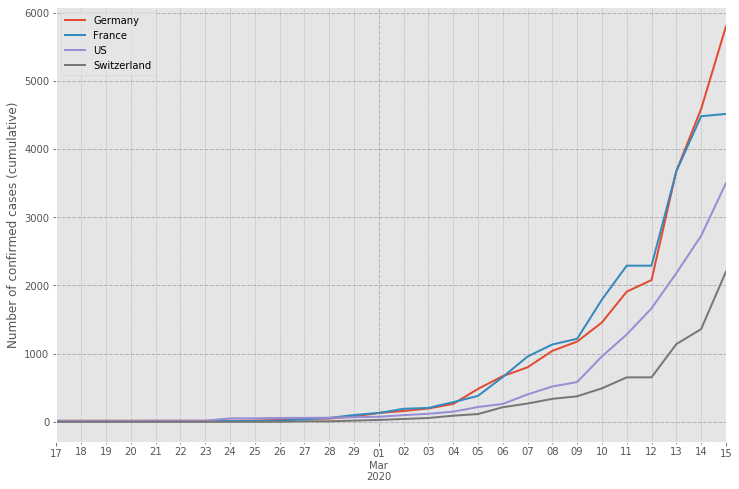

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
covid_top5_8.loc['2020-02-17':,:]\
.plot(ax=ax,linewidth='2')
# Turn on grid
ax.grid(which='major', linestyle='-.', linewidth='0.5', color='gray')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
ax.set_ylabel('Number of confirmed cases (cumulative)')

In [29]:
covid_top5_8_growth = covid_top5_8.loc['2020-02-17':'2020-03-14',:].pct_change().rolling(2).mean()

In [30]:
covid_top5_8_growth

,Germany,France,US,Switzerland
2020-02-17,NaN,NaN,NaN,NaN
2020-02-18,NaN,NaN,NaN,NaN
2020-02-19,0.000000,0.000000,0.000000,NaN
2020-02-20,0.000000,0.000000,0.000000,NaN
2020-02-21,0.000000,0.000000,0.076923,NaN
2020-02-22,0.000000,0.000000,0.076923,NaN
2020-02-23,0.000000,0.000000,0.000000,NaN
2020-02-24,0.000000,0.000000,1.200000,NaN
2020-02-25,0.031250,0.083333,1.200000,NaN
2020-02-26,0.325368,0.226190,0.058824,NaN


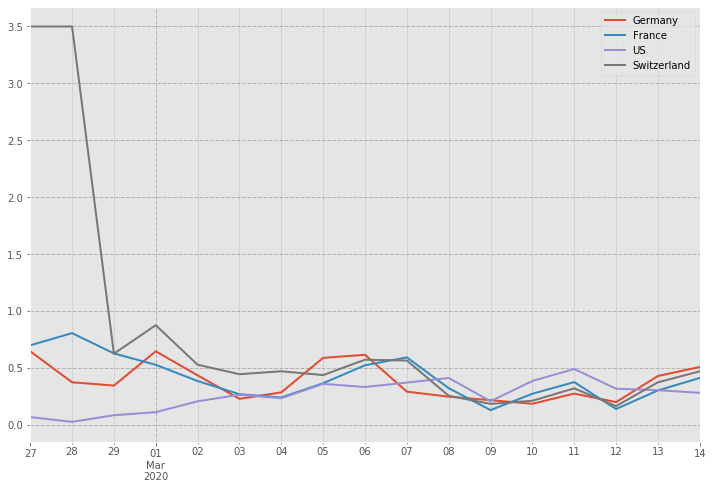

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
covid_top5_8_growth.loc['2020-02-17':'2020-03-14',:].dropna()\
.plot(ax=ax,linewidth='2')
# Turn on grid
ax.grid(which='major', linestyle='-.', linewidth='0.5', color='gray')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

In [32]:
covid_top5_8_growth

,Germany,France,US,Switzerland
2020-02-17,NaN,NaN,NaN,NaN
2020-02-18,NaN,NaN,NaN,NaN
2020-02-19,0.000000,0.000000,0.000000,NaN
2020-02-20,0.000000,0.000000,0.000000,NaN
2020-02-21,0.000000,0.000000,0.076923,NaN
2020-02-22,0.000000,0.000000,0.076923,NaN
2020-02-23,0.000000,0.000000,0.000000,NaN
2020-02-24,0.000000,0.000000,1.200000,NaN
2020-02-25,0.031250,0.083333,1.200000,NaN
2020-02-26,0.325368,0.226190,0.058824,NaN


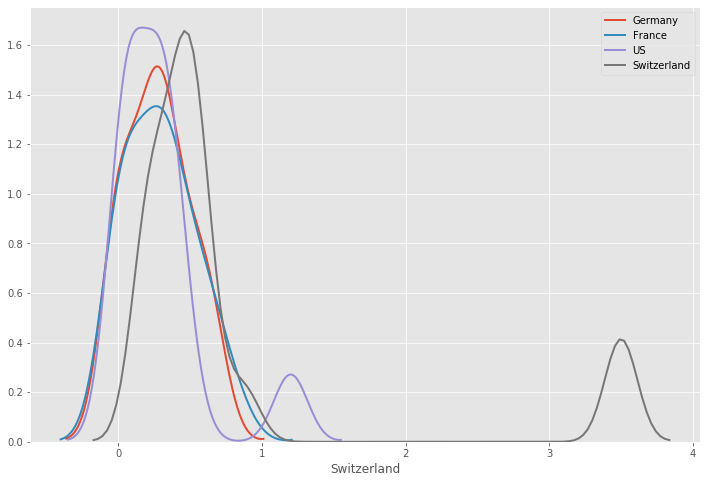

In [33]:
plt.figure(figsize=(12,8))
sns.set_context(rc={"lines.linewidth": 2}) # font_scale=1.5, 
sns.distplot(covid_top5_8_growth['Germany'].dropna(),hist=False,label='Germany')
sns.distplot(covid_top5_8_growth['France'].dropna(),hist=False,label='France')
sns.distplot(covid_top5_8_growth['US'].dropna(),hist=False,label='US')
sns.distplot(covid_top5_8_growth['Switzerland'].dropna(),hist=False,label='Switzerland')

Finally, let's tag everyone at the same rate of growth

In [34]:
sub_italy = covid_top1_4.loc['2020-02-23':,['Italy']]

In [35]:
sub_iran = covid_top1_4.loc['2020-02-26':,['Iran']]

In [36]:
sub_sk = covid_top1_4.loc['2020-02-20':,['South Korea']]

In [37]:
sub_us = covid_top5_8.loc['2020-03-04':,['US']]

In [38]:
# Let's predict US cases for the next week

In [39]:
pred_interval = pd.date_range(start='03/16/2020', end='03/22/2020')
pred_values = np.zeros(7)
pred_df = pd.DataFrame({'US':pred_values}, index=pred_interval)

In [40]:
sub_us_pred = pd.concat([sub_us,pred_df],axis=0)

In [41]:
sub_us_pred

,US
2020-03-04,149.0
2020-03-05,217.0
2020-03-06,262.0
2020-03-07,402.0
2020-03-08,518.0
2020-03-09,583.0
2020-03-10,959.0
2020-03-11,1281.0
2020-03-12,1663.0
2020-03-13,2179.0


In [42]:
sub_us_pred['Italy'] = sub_italy.iloc[0:sub_us_pred.shape[0]].values
sub_us_pred['Iran'] = sub_iran.iloc[0:sub_us_pred.shape[0]].values
sub_us_pred['SK'] = sub_sk.iloc[0:sub_us_pred.shape[0]].values

In [43]:
sub_us_pred=sub_us_pred.astype('int')

In [44]:
sub_us_pred

,US,Italy,Iran,SK
2020-03-04,149,155,139,104
2020-03-05,217,229,245,204
2020-03-06,262,322,388,433
2020-03-07,402,453,593,602
2020-03-08,518,655,978,833
2020-03-09,583,888,1501,977
2020-03-10,959,1128,2336,1261
2020-03-11,1281,1694,2922,1766
2020-03-12,1663,2036,3513,2337
2020-03-13,2179,2502,4747,3150


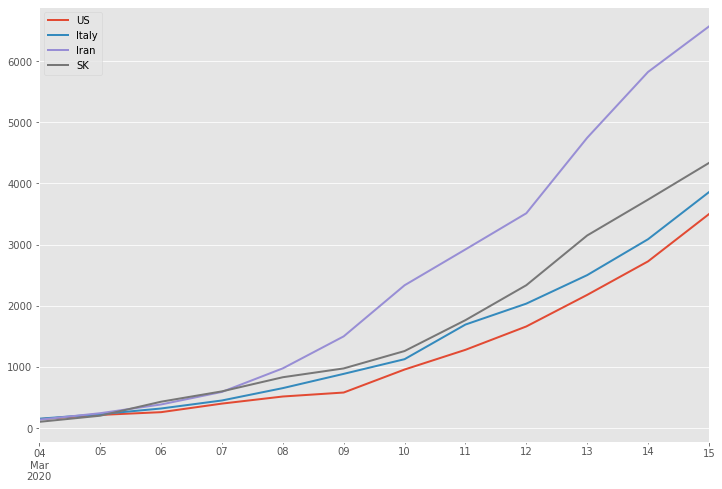

In [45]:
sub_us_pred.loc['2020-03-04':'2020-03-15',:].plot(figsize=(12,8))

In [46]:
# Let's use a model based approach

In [47]:
df= sub_us_pred.loc['2020-03-04':'2020-03-15',['US','Italy','Iran','SK']]

In [48]:
df.reset_index(inplace=True)

In [49]:
df.rename(columns={'index':'ds','US':'y'},inplace=True)

### Using the US only

In [50]:
m_us = Prophet()
m_us.fit(df.drop(columns=['Iran','Italy','SK']))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.


In [51]:
future_us = m_us.make_future_dataframe(7)

In [52]:
forecast_us = m_us.predict(future_us)

In [53]:
forecast_us.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
14,2020-03-18,3635.245365,3171.175298,4102.437703,3635.245352,3635.245377,0.0,0.0,0.0,0.0,0.0,0.0,3635.245365
15,2020-03-19,3921.328593,3443.527545,4380.356788,3921.328573,3921.328612,0.0,0.0,0.0,0.0,0.0,0.0,3921.328593
16,2020-03-20,4207.411820,3734.476732,4649.339694,4207.411792,4207.411848,0.0,0.0,0.0,0.0,0.0,0.0,4207.411820
17,2020-03-21,4493.495048,4041.574601,4981.198001,4493.495009,4493.495084,0.0,0.0,0.0,0.0,0.0,0.0,4493.495048
18,2020-03-22,4779.578276,4313.244557,5246.481379,4779.578227,4779.578322,0.0,0.0,0.0,0.0,0.0,0.0,4779.578276


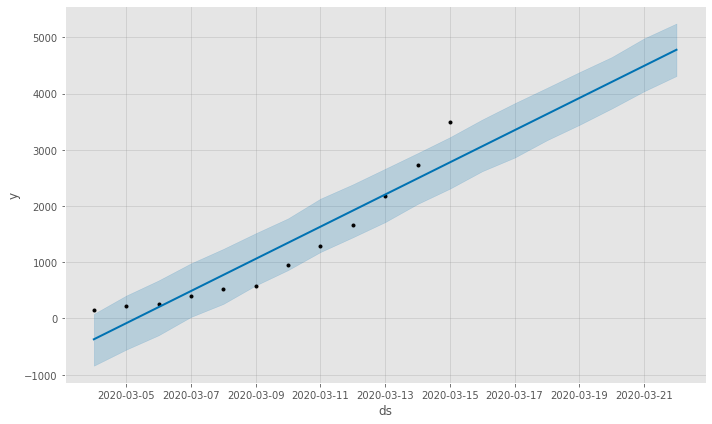

In [54]:
fig = m_us.plot(forecast_us)

### Using Italy

In [55]:
m_it = Prophet()
m_it.add_regressor('Italy')

In [56]:
m_it.fit(df.drop(columns=['Iran','SK']))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.


In [57]:
future_it = m_it.make_future_dataframe(7)

In [58]:
future_it['Italy']= sub_us_pred['Italy'].values

In [59]:
forecast_it = m_it.predict(future_it)

In [60]:
forecast_it.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Italy,Italy_lower,Italy_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
14,2020-03-18,682.925679,6968.875012,7125.346421,682.870343,682.979709,6363.935438,6363.935438,6363.935438,6363.935438,6363.935438,6363.935438,6363.935438,6363.935438,6363.935438,0.0,0.0,0.0,7046.861117
15,2020-03-19,621.744222,8821.216433,8980.672062,621.656975,621.828252,8283.504387,8283.504387,8283.504387,8283.504387,8283.504387,8283.504387,8283.504387,8283.504387,8283.504387,0.0,0.0,0.0,8905.248609
16,2020-03-20,560.562765,9807.613404,9969.346006,560.434411,560.679369,9327.143154,9327.143154,9327.143154,9327.143154,9327.143154,9327.143154,9327.143154,9327.143154,9327.143154,0.0,0.0,0.0,9887.705919
17,2020-03-21,499.381308,12216.582668,12372.622847,499.210489,499.537874,11797.907194,11797.907194,11797.907194,11797.907194,11797.907194,11797.907194,11797.907194,11797.907194,11797.907194,0.0,0.0,0.0,12297.288502
18,2020-03-22,438.199851,12165.003957,12315.139094,437.988114,438.406477,11797.907194,11797.907194,11797.907194,11797.907194,11797.907194,11797.907194,11797.907194,11797.907194,11797.907194,0.0,0.0,0.0,12236.107045


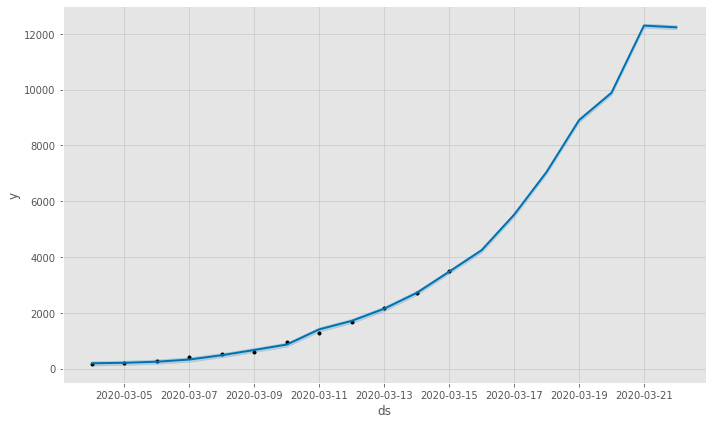

In [61]:
fig = m_it.plot(forecast_it)

In [62]:
m_it.params

{'k': array([[-0.19268009]]),
 'm': array([[0.44018995]]),
 'delta': array([[-5.06059032e-10, -1.53484313e-09, -1.90808113e-07,
          7.87921456e-10, -7.16417820e-10, -1.15070392e-09,
          3.40745839e-04,  3.74253287e-09]]),
 'sigma_obs': array([[0.01760625]]),
 'beta': array([[0.3735331]])}

### Using Iran

In [63]:
m_ir = Prophet()
m_ir.add_regressor('Iran')

In [64]:
m_ir.fit(df.drop(columns=['Italy','SK']))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.


In [65]:
future_ir = m_ir.make_future_dataframe(7)

In [66]:
future_ir['Iran']= sub_us_pred['Iran'].values

In [67]:
forecast_ir = m_ir.predict(future_ir)

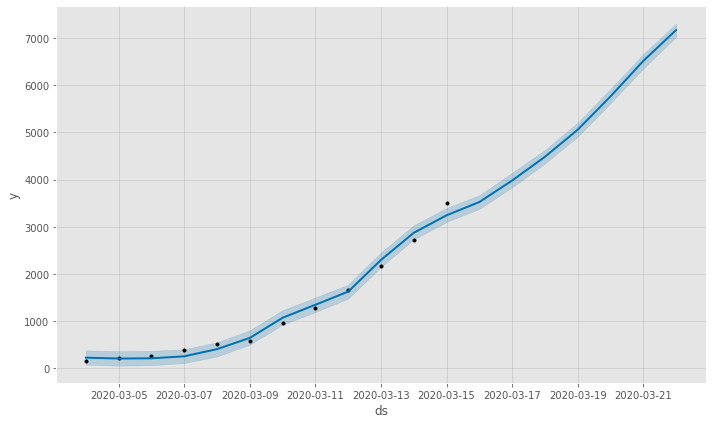

In [68]:
fig = m_ir.plot(forecast_ir)

In [69]:
m_ir.params

{'k': array([[-0.26052894]]),
 'm': array([[0.4741466]]),
 'delta': array([[-1.38274182e-09, -4.08494953e-09, -1.61305085e-09,
         -1.62502587e-09,  4.61386028e-09,  2.11607570e-08,
          8.10094041e-10,  1.03050033e-08]]),
 'sigma_obs': array([[0.03349046]]),
 'beta': array([[0.3938136]])}

### Using SK

In [70]:
m_sk = Prophet()
m_sk.add_regressor('SK')

In [71]:
m_sk.fit(df.drop(columns=['Italy','Iran']))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.


In [72]:
future_sk = m_sk.make_future_dataframe(7)

In [73]:
future_sk['SK']= sub_us_pred['SK'].values

In [74]:
forecast_sk = m_sk.predict(future_sk)

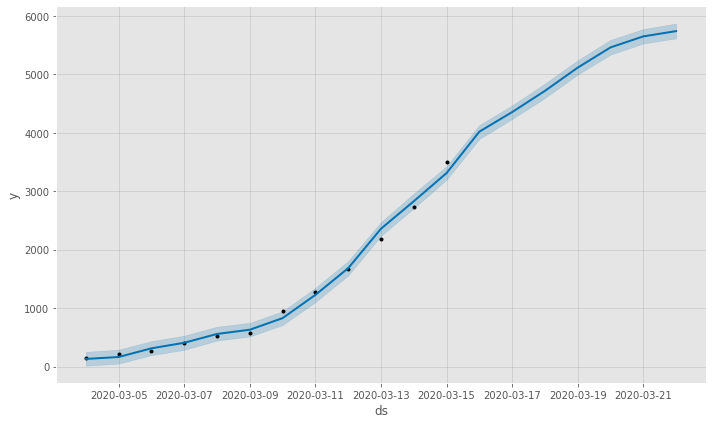

In [75]:
fig = m_sk.plot(forecast_sk)

In [76]:
m_sk.params

{'k': array([[-0.17992697]]),
 'm': array([[0.43381523]]),
 'delta': array([[ 1.61955354e-10,  4.77511069e-12, -1.52132493e-10,
          1.25093941e-10, -4.65915609e-11,  7.67713368e-11,
          1.04646128e-10,  2.17048351e-06]]),
 'sigma_obs': array([[0.02721555]]),
 'beta': array([[0.36892401]])}

In [77]:
forecast_sk.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,SK,SK_lower,SK_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
14,2020-03-18,716.659784,4593.977803,4839.943106,716.659428,716.660104,3998.966692,3998.966692,3998.966692,3998.966692,3998.966692,3998.966692,3998.966692,3998.966692,3998.966692,0.0,0.0,0.0,4715.626475
15,2020-03-19,659.427341,4994.255129,5238.704394,659.426734,659.427862,4453.479954,4453.479954,4453.479954,4453.479954,4453.479954,4453.479954,4453.479954,4453.479954,4453.479954,0.0,0.0,0.0,5112.907296
16,2020-03-20,602.194899,5335.695283,5587.878724,602.194073,602.195633,4856.691720,4856.691720,4856.691720,4856.691720,4856.691720,4856.691720,4856.691720,4856.691720,4856.691720,0.0,0.0,0.0,5458.886619
17,2020-03-21,544.962457,5525.976754,5772.462612,544.961401,544.963413,5102.398890,5102.398890,5102.398890,5102.398890,5102.398890,5102.398890,5102.398890,5102.398890,5102.398890,0.0,0.0,0.0,5647.361347
18,2020-03-22,487.730014,5613.628358,5867.658179,487.728636,487.731276,5250.003197,5250.003197,5250.003197,5250.003197,5250.003197,5250.003197,5250.003197,5250.003197,5250.003197,0.0,0.0,0.0,5737.733212


### Using all Countries

In [78]:
m = Prophet()
m.add_regressor('Italy')
m.add_regressor('Iran')
m.add_regressor('SK')

In [79]:
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.


In [80]:
#future = sub_us_pred.loc['2020-03-16':'2020-03-22',['Italy']].reset_index()
future = m.make_future_dataframe(7)

In [81]:
#future.rename(columns={'index':'ds'},inplace=True)

In [82]:
future['Italy']= sub_us_pred['Italy'].values
future['Iran']= sub_us_pred['Iran'].values
future['SK']= sub_us_pred['SK'].values

In [83]:
forecast = m.predict(future)

In [84]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Iran,Iran_lower,Iran_upper,Italy,Italy_lower,Italy_upper,SK,SK_lower,SK_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-04,1580.007728,120.663767,257.071743,1580.007728,1580.007728,-49.635285,-49.635285,-49.635285,-955.592280,-955.592280,-955.592280,-386.384907,-386.384907,-386.384907,-1391.612471,-1391.612471,-1391.612471,-1391.612471,-1391.612471,-1391.612471,0.0,0.0,0.0,188.395257
1,2020-03-05,1511.506748,133.190436,269.747276,1511.506748,1511.506748,-47.387089,-47.387089,-47.387089,-899.577629,-899.577629,-899.577629,-361.308547,-361.308547,-361.308547,-1308.273265,-1308.273265,-1308.273265,-1308.273265,-1308.273265,-1308.273265,0.0,0.0,0.0,203.233483
2,2020-03-06,1443.005768,197.053273,327.884586,1443.005768,1443.005768,-44.354146,-44.354146,-44.354146,-829.180838,-829.180838,-829.180838,-303.883684,-303.883684,-303.883684,-1177.418668,-1177.418668,-1177.418668,-1177.418668,-1177.418668,-1177.418668,0.0,0.0,0.0,265.587101
3,2020-03-07,1374.504788,275.827852,409.649114,1374.504788,1374.504788,-40.006220,-40.006220,-40.006220,-730.019767,-730.019767,-730.019767,-261.504636,-261.504636,-261.504636,-1031.530623,-1031.530623,-1031.530623,-1031.530623,-1031.530623,-1031.530623,0.0,0.0,0.0,342.974165
4,2020-03-08,1306.003804,427.741245,566.745448,1306.003804,1306.003804,-31.840603,-31.840603,-31.840603,-577.114910,-577.114910,-577.114910,-203.578246,-203.578246,-203.578246,-812.533758,-812.533758,-812.533758,-812.533758,-812.533758,-812.533758,0.0,0.0,0.0,493.470045
5,2020-03-09,1237.502820,580.657802,711.251421,1237.502820,1237.502820,-20.748090,-20.748090,-20.748090,-400.744455,-400.744455,-400.744455,-167.468288,-167.468288,-167.468288,-588.960833,-588.960833,-588.960833,-588.960833,-588.960833,-588.960833,0.0,0.0,0.0,648.541987
6,2020-03-10,1169.001836,779.882983,914.188287,1169.001836,1169.001836,-3.038246,-3.038246,-3.038246,-219.075318,-219.075318,-219.075318,-96.251427,-96.251427,-96.251427,-318.364990,-318.364990,-318.364990,-318.364990,-318.364990,-318.364990,0.0,0.0,0.0,850.636846
7,2020-03-11,1100.500853,1282.635764,1417.656845,1100.500853,1100.500853,9.390459,9.390459,9.390459,209.361065,209.361065,209.361065,30.384189,30.384189,30.384189,249.135713,249.135713,249.135713,249.135713,249.135713,249.135713,0.0,0.0,0.0,1349.636566
8,2020-03-12,1032.005985,1628.881667,1762.742776,1032.005985,1032.005985,21.925211,21.925211,21.925211,468.239586,468.239586,468.239586,173.570202,173.570202,173.570202,663.735000,663.735000,663.735000,663.735000,663.735000,663.735000,0.0,0.0,0.0,1695.740985
9,2020-03-13,963.512948,2144.732624,2279.759650,963.512948,963.512948,48.097604,48.097604,48.097604,820.980495,820.980495,820.980495,377.441005,377.441005,377.441005,1246.519104,1246.519104,1246.519104,1246.519104,1246.519104,1246.519104,0.0,0.0,0.0,2210.032052


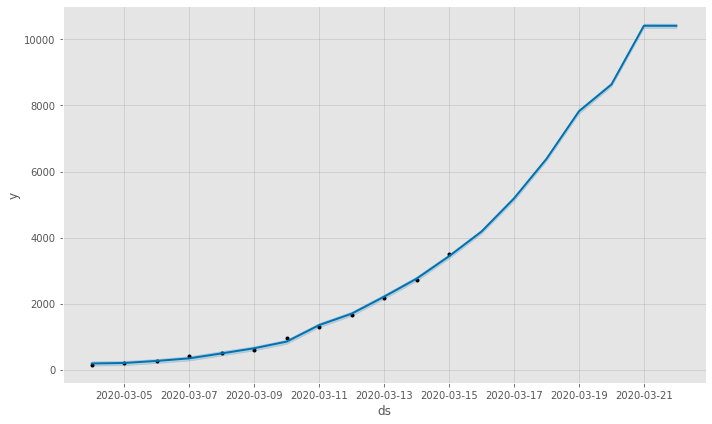

In [85]:
fig = m.plot(forecast)

In [86]:
final_df = pd.DataFrame({'using Italy':forecast_it['yhat'], 
                         'using Iran':forecast_ir['yhat'],
                         'using SouthKorea': forecast_sk['yhat'],
                         'using All':forecast['yhat']})

In [87]:
final_df.index = forecast.ds

Text(0.5, 0, '')

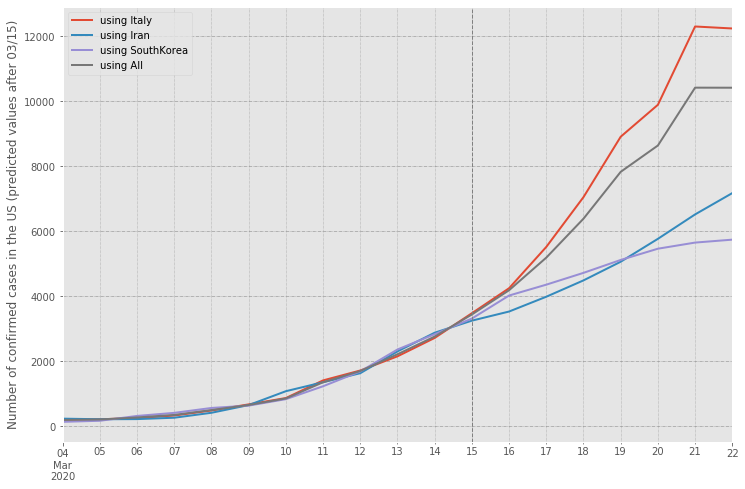

In [88]:
fig,ax = plt.subplots()
final_df.plot(figsize=(12,8),ax=ax)
ax.axvline(linewidth=1, linestyle='--', color='gray',x='2020-03-15')
ax.set_ylabel('Number of confirmed cases in the US (predicted values after 03/15)')
# Turn on grid
ax.grid(which='major', linestyle='-.', linewidth='0.5', color='gray')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
ax.set_xlabel('')

In [89]:
final_df

,using Italy,using Iran,using SouthKorea,using All
ds,,,,
2020-03-04,191.701617,228.805433,131.129032,188.395257
2020-03-05,209.459190,210.714982,163.898526,203.233483
2020-03-06,247.512707,215.236917,312.771407,265.587101
2020-03-07,326.158109,257.649879,407.642713,342.974165
2020-03-08,480.646186,410.069051,558.315647,493.470045
2020-03-09,668.248697,646.826317,630.686296,648.541987
2020-03-10,863.328661,1074.261015,829.060622,850.636846
2020-03-11,1406.644282,1349.520463,1226.340752,1349.636566
2020-03-12,1710.789802,1627.835639,1683.022616,1695.740985


In [92]:
5737/3499

1.6396113175192912

In [93]:
12236/3499

3.4969991426121747

In [94]:
10413/3499

2.9759931408973994

In [95]:
(12236-5737)

6499

In [97]:
6500*0.057

370.5